# Laboratorio 5, Clustering

## Parte 1


In [44]:
import random 
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn.cluster import KMeans 
from sklearn.datasets import make_blobs
%matplotlib inline

### Generación de dataset aleatorio

In [45]:
np.random.seed(0)

### Se genera un seed para que la alateorización sea repetible en las corridas de este script

### Generación de set agrupado aleatorio.



In [46]:
X, y = make_blobs(n_samples=5000, centers=[[4,4], [-2, -1], [2, -3], [1, 1]], cluster_std=0.9)

In [47]:
X

array([[-1.82150565,  0.07098024],
       [ 2.16732621, -2.93199608],
       [ 0.8465158 , -3.26075305],
       ...,
       [ 3.29772603,  4.24400152],
       [-1.69503125, -0.29979681],
       [-1.64362141,  0.63035513]])

In [48]:
y

array([1, 2, 2, ..., 0, 1, 1])

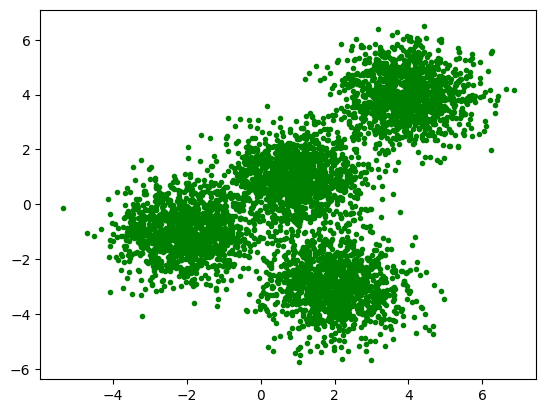

In [49]:
plt.scatter(X[:, 0], X[:, 1], marker='.', color = 'green')

### K-means

In [50]:
k_means = KMeans(init = "k-means++", n_clusters = 4, n_init = 12)

In [51]:
k_means.fit(X)

KMeans(n_clusters=4, n_init=12)

In [52]:
k_means_labels = k_means.labels_
k_means_labels

array([0, 3, 3, ..., 1, 0, 0])

In [53]:
len(k_means_labels)

5000

In [54]:
k_means_cluster_centers = k_means.cluster_centers_
k_means_cluster_centers

array([[-2.03743147, -0.99782524],
       [ 3.97334234,  3.98758687],
       [ 0.96900523,  0.98370298],
       [ 1.99741008, -3.01666822]])

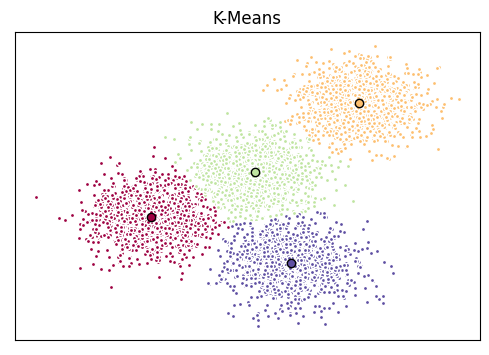

In [55]:
# Inicializar el dibujo con las dimensiones especificadas.
fig = plt.figure(figsize=(6, 4))

# Los colores usan un mapa de color, dónde produciremos un arreglo de colores basados en
# el número de etiquetas que hay. Usaremos set(k_means_labels) para obtener
# etiquetas unívocas.
colors = plt.cm.Spectral(np.linspace(0, 1, len(set(k_means_labels))))

# Crear un dibujo
ax = fig.add_subplot(1, 1, 1)

# Loop For que dibuja los puntos de datos y los centroides.
# k tomará valores entre 0-3, los cuales coincidirán con los clusters posibles en el
# que está cada punto.
for k, col in zip(range(len([[4,4], [-2, -1], [2, -3], [1, 1]])), colors):

    # Crear una lista de todos los puntos, donde aquellos que están 
    # en el cluster (ej. cluster 0) están etiquetados como verdadero, o en su defecto
    # estarán etiquetados como falso.
    my_members = (k_means_labels == k)
    
    # Definir el centroide o centro del cluster.
    cluster_center = k_means_cluster_centers[k]
    
    # Dibjuar los puntos de datos con color col.
    ax.plot(X[my_members, 0], X[my_members, 1], 'w', markerfacecolor=col, marker='.')
    
    # Dibujo de los centroides con un color específico pero una linea más oscura
    ax.plot(cluster_center[0], cluster_center[1], 'o', markerfacecolor=col,  markeredgecolor='k', markersize=6)

# Título del dibujo
ax.set_title('K-Means')

# Eliminar los ticks del eje x
ax.set_xticks(())

# Eliminar los ticks del eje y
ax.set_yticks(())

# Mostrar el dibujo
plt.show()


### Agrupando los datos en 3 clusters

In [56]:
TresClusters = KMeans(init = "k-means++", n_clusters = 3, n_init = 15)

In [57]:
TresClusters.fit(X)

KMeans(n_clusters=3, n_init=15)

In [58]:
ClustersLabels = TresClusters.labels_
ClusterCentros = TresClusters.cluster_centers_

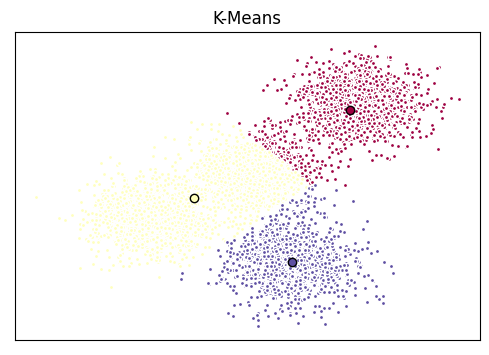

In [59]:
# Inicializar el dibujo con las dimensiones especificadas.
fig2 = plt.figure(figsize=(6, 4))
# Los colores usan un mapa de color, dónde produciremos un arreglo de colores basados en
# el número de etiquetas que hay. Usaremos set(k_means_labels) para obtener
# etiquetas unívocas.
colores = plt.cm.Spectral(np.linspace(0, 1, len(set(ClustersLabels))))

# Crear un dibujo
ax2 = fig2.add_subplot(1, 1, 1)
# Loop For que dibuja los puntos de datos y los centroides.
# k tomará valores entre 0-3, los cuales coincidirán con los clusters posibles en el
# que está cada punto.
for k, col in zip(range(len([[4,4], [-2, -1], [2, -3], [1, 1]])), colores):
    # Crear una lista de todos los puntos, donde aquellos que están 
    # en el cluster (ej. cluster 0) están etiquetados como verdadero, o en su defecto
    # estarán etiquetados como falso.
    my_members = (ClustersLabels == k)
    
    # Definir el centroide o centro del cluster.
    cluster_center = ClusterCentros[k]
    
    # Dibjuar los puntos de datos con color col.
    ax2.plot(X[my_members, 0], X[my_members, 1], 'w', markerfacecolor=col, marker='.')
    
    # Dibujo de los centroides con un color específico pero una linea más oscura
    ax2.plot(cluster_center[0], cluster_center[1], 'o', markerfacecolor=col,  markeredgecolor='k', markersize=6)

# Título del dibujo
ax2.set_title('K-Means')

# Eliminar los ticks del eje x
ax2.set_xticks(())

# Eliminar los ticks del eje y
ax2.set_yticks(())
# Mostrar el dibujo
plt.show()

## Parte 2

In [61]:
import pandas as pd
cust_df = pd.read_csv("Cust_Segmentation.csv")
cust_df.sample(10)

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,Address,DebtIncomeRatio
489,490,23,1,2,25,0.124,1.001,1.0,NBA001,4.5
576,577,29,1,6,21,1.110,2.691,0.0,NBA007,18.1
713,714,54,3,21,118,9.600,7.392,0.0,NBA020,14.4
290,291,30,1,4,33,0.500,0.886,0.0,NBA000,4.2
447,448,38,1,5,54,1.500,4.224,0.0,NBA005,10.6
144,145,34,1,12,68,7.817,9.251,1.0,NBA005,25.1
809,810,22,1,4,19,1.887,2.502,1.0,NBA003,23.1
244,245,43,1,4,26,0.751,1.095,NaN,NBA011,7.1
36,37,35,3,5,37,0.581,1.417,1.0,NBA003,5.4
81,82,30,3,0,65,3.900,15.405,1.0,NBA008,29.7


In [62]:
df = cust_df.drop('Address', axis=1)

In [63]:
from sklearn.preprocessing import StandardScaler
X = df.values[:,1:]
X = np.nan_to_num(X)
Clus_dataSet = StandardScaler().fit_transform(X)
Clus_dataSet

array([[ 0.74291541,  0.31212243, -0.37878978, ..., -0.59048916,
        -0.52379654, -0.57652509],
       [ 1.48949049, -0.76634938,  2.5737211 , ...,  1.51296181,
        -0.52379654,  0.39138677],
       [-0.25251804,  0.31212243,  0.2117124 , ...,  0.80170393,
         1.90913822,  1.59755385],
       ...,
       [-1.24795149,  2.46906604, -1.26454304, ...,  0.03863257,
         1.90913822,  3.45892281],
       [-0.37694723, -0.76634938,  0.50696349, ..., -0.70147601,
        -0.52379654, -1.08281745],
       [ 2.1116364 , -0.76634938,  1.09746566, ...,  0.16463355,
        -0.52379654, -0.2340332 ]])

In [64]:
clusterNum = 3
k_means = KMeans(init = "k-means++", n_clusters = clusterNum, n_init = 12)
k_means.fit(X)
labels = k_means.labels_
print(labels)

[1 0 1 1 2 0 1 0 1 0 0 1 1 1 1 1 1 1 0 1 1 1 1 0 0 0 1 1 0 1 0 1 1 1 1 1 1
 1 1 0 1 0 1 2 1 0 1 1 1 0 0 1 1 0 0 1 1 1 0 1 0 1 0 0 1 1 0 1 1 1 0 0 0 1
 1 1 1 1 0 1 0 0 2 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 0 1
 1 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 0 1 1 1 1 1 1 1 0 1 0 1
 1 1 1 1 1 1 0 1 0 0 1 0 1 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 0 1 1 1 0 1
 1 1 1 1 0 1 1 0 1 0 1 1 0 2 1 0 1 1 1 1 1 1 2 0 1 1 1 1 0 1 1 0 0 1 0 1 0
 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 2 0 1 1 1 1 1 1 1 0 1 1 1 1
 1 1 0 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 0 1 0 1 0 0 1 1 1 1 1 1
 1 1 1 0 0 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 1 0 1 0 0 1
 1 1 1 1 0 1 1 1 1 1 1 0 1 1 0 1 1 0 1 1 1 1 1 0 1 1 1 2 1 1 1 0 1 0 0 0 1
 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1
 1 0 1 1 0 1 1 1 1 0 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 1 1 1 2
 1 1 1 1 1 1 0 1 1 1 2 1 1 1 1 0 1 2 1 1 1 1 0 1 0 0 0 1 1 0 0 1 1 1 1 1 1
 1 0 1 1 1 1 0 1 1 1 0 1 

In [65]:
df["Clus_km"] = labels
df.sample(10)

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio,Clus_km
366,367,41,1,16,68,0.448,3.224,0.0,5.4,0
684,685,21,3,0,24,0.833,1.015,0.0,7.7,1
37,38,37,1,0,18,1.584,0.738,1.0,12.9,1
56,57,32,1,1,20,0.315,0.645,1.0,4.8,1
356,357,40,2,13,102,6.227,13.051,1.0,18.9,0
768,769,39,1,4,33,0.397,1.913,0.0,7.0,1
9,10,47,3,23,115,0.653,3.947,0.0,4.0,0
79,80,46,2,18,55,0.419,2.001,NaN,4.4,1
441,442,43,2,10,37,0.676,2.469,0.0,8.5,1
88,89,28,2,8,31,1.492,1.050,1.0,8.2,1


In [66]:
df.groupby('Clus_km').mean()

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio
Clus_km,,,,,,,,,
0,402.295082,41.333333,1.956284,15.256831,83.928962,3.103639,5.765279,0.171233,10.724590
1,432.468413,32.964561,1.614792,6.374422,31.164869,1.032541,2.104133,0.285185,10.094761
2,410.166667,45.388889,2.666667,19.555556,227.166667,5.678444,10.907167,0.285714,7.322222


C:\Users\Silvio Alejandro\AppData\Local\Temp\ipykernel_5188\2606184882.py:2: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  plt.scatter(X[:, 0], X[:, 3], s=area, c=labels.astype(np.float), alpha=0.5)


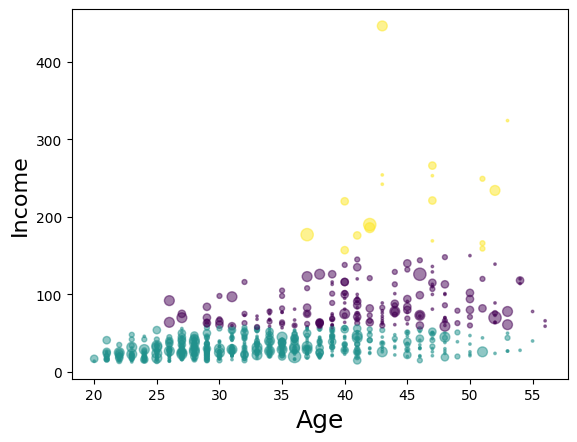

In [68]:
area = np.pi * ( X[:, 1])**2  
plt.scatter(X[:, 0], X[:, 3], s=area, c=labels.astype(np.float), alpha=0.5)
plt.xlabel('Age', fontsize=18)
plt.ylabel('Income', fontsize=16)

plt.show()

C:\Users\Silvio Alejandro\AppData\Local\Temp\ipykernel_5188\2223774382.py:4: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)
C:\Users\Silvio Alejandro\AppData\Local\Temp\ipykernel_5188\2223774382.py:11: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  ax.scatter(X[:, 1], X[:, 0], X[:, 3], c= labels.astyp

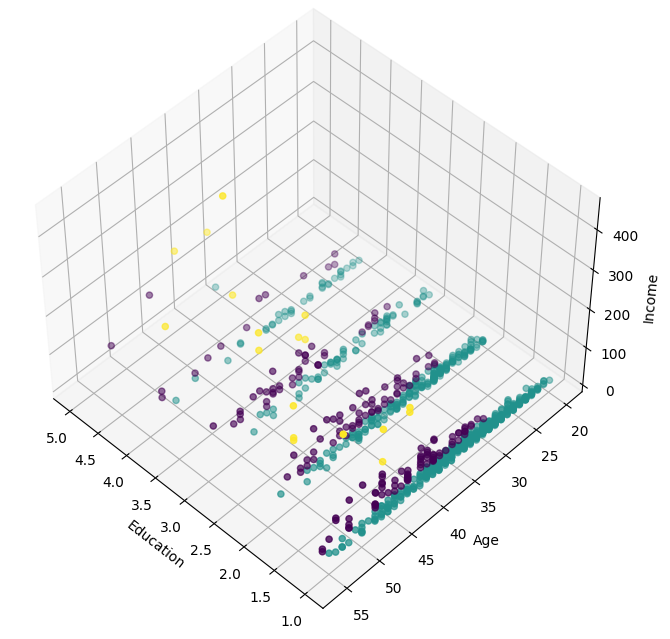

In [72]:
from mpl_toolkits.mplot3d import Axes3D 
fig = plt.figure(1, figsize=(8, 6))
plt.clf()
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)

plt.cla()
ax.set_xlabel('Education')
ax.set_ylabel('Age')
ax.set_zlabel('Income')

ax.scatter(X[:, 1], X[:, 0], X[:, 3], c= labels.astype(np.float))